In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [4]:
classio = pd.DataFrame([[1.0, 0.5, 0],
                       [2.0, 2.0, 0],
                       [2.5, 1.5, 0],
                       [3.0, 3.0, 0],
                       [4.0, 1.0, 0],
                       [5.0, 5.0, 0],
                       [1.0, 1.5, 1],
                       [1.5, 3.0, 1],
                       [3.0, 4.0, 1],
                       [3.5, 5.0, 1],],
                      columns=['x1', 'x2', 'y'])

In [5]:
classio

,x1,x2,y
0,1.0,0.5,0
1,2.0,2.0,0
2,2.5,1.5,0
3,3.0,3.0,0
4,4.0,1.0,0
5,5.0,5.0,0
6,1.0,1.5,1
7,1.5,3.0,1
8,3.0,4.0,1
9,3.5,5.0,1


In [14]:
X=classio[['x1', 'x2']]
y=classio['y']

In [16]:
y

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: y, dtype: int64

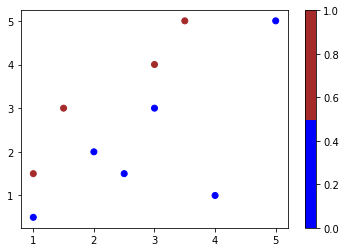

In [32]:
#plt.plot(X['x1'], X['x2'], '.')

colors = ['blue', 'brown']
plt.scatter(X['x1'], X['x2'], c=y, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()

In [23]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_clf = Pipeline((
           ("scaler", StandardScaler()),
           ("linear_svc", LinearSVC(C=1, loss="hinge")),
       ))

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [24]:
svm_clf.predict([[1.5, 4]])

array([1], dtype=int64)

In [25]:
svm_clf.decision_function

<function sklearn.pipeline.Pipeline.decision_function(self, X)>

In [33]:
svm_clf.coef_


AttributeError: 'Pipeline' object has no attribute 'coef_'

In [36]:
svm_clf.named_steps["linear_svc"].coef_

array([[-1.24595372,  1.53375422]])

In [37]:
svm_clf.named_steps["linear_svc"].intercept_

array([-0.49995592])

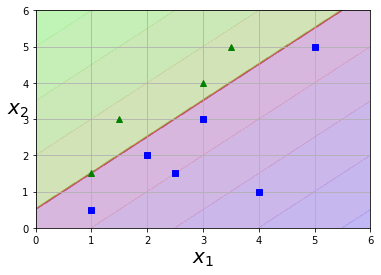

In [50]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
plot_predictions(svm_clf, [0.0, 6.0, 0.0, 6.0])
plot_dataset(np.array(X), y, [0.0, 6.0, 0.0, 6.0])

In [52]:
from sklearn.linear_model import SGDClassifier

In [55]:
sgd_clf = Pipeline((
           ("scaler", StandardScaler()),
           ("linear_sgd", SGDClassifier(alpha=.1, loss="hinge")),
       ))

In [57]:
sgd_clf.fit(X, y)

C:\Users\jwharton\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_sgd', SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

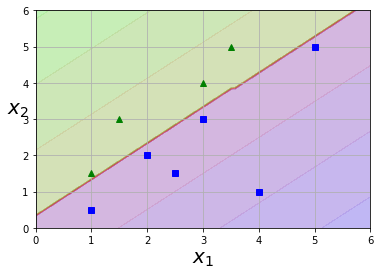

In [58]:
plot_predictions(sgd_clf, [0.0, 6.0, 0.0, 6.0])
plot_dataset(np.array(X), y, [0.0, 6.0, 0.0, 6.0])

In [99]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [100]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

# linear SVC does OVO


svm_clf = Pipeline((
           ("scaler", StandardScaler()),
           ("linear_svc", LinearSVC(C=100, loss="hinge")),
       ))
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

C:\Users\jwharton\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [101]:
from sklearn.metrics import accuracy_score
print ("accuracy score is: {}".format(accuracy_score(y_test, y_pred)))

accuracy score is: 0.8646285714285714


In [98]:
subbed = train_df.groupby('y').apply(lambda x: x.sample(frac=0.01))
y_sub = subbed['y']
X_sub = subbed.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub)
svm_clf1 = Pipeline((
           ("scaler", StandardScaler()),
           ("linear_svc", LinearSVC(C=100, loss="hinge")),
       ))
svm_clf1.fit(X_train, y_train)

y_pred = svm_clf1.predict(X_test)


from sklearn.metrics import accuracy_score
print ("accuracy score is: {}".format(accuracy_score(y_test, y_pred)))

accuracy score is: 0.8457142857142858


In [79]:
train_df = pd.DataFrame(X)

In [81]:
train_df['y'] = y

In [82]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [87]:
subbed = train_df.groupby('y').apply(lambda x: x.sample(frac=0.05))
y_sub = subbed['y']
X_sub = subbed.drop('y', axis=1)

In [90]:
X_sub.shape

(3501, 784)

In [86]:
train_df.shape

(70000, 785)

In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
HOUSING_PATH = "datasets/housing"
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [9]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [10]:
#copy in train set
housing = strat_train_set.copy()

In [11]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [12]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [13]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
housing_num = housing.drop("ocean_proximity", axis=1)

In [14]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [15]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

In [16]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [18]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):  # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [27]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

In [28]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [29]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [40]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(housing_prepared, housing_labels)

LinearSVR(C=1.0, dual=True, epsilon=0.2, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [41]:
from sklearn.metrics import mean_squared_error
housing_predictions = svm_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

218339.15956036837